In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inLine

# Mission 1. Netfilx and Code

### Mandatory Part

 - 한국 작품은 총 얼마나 있는가?
   1. country column을 기준으로 한다.
   2. "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [54]:
nfx = pd.read_csv("./netflix_titles.csv")

nfx

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [55]:
K_nfx = nfx[nfx['country']=='South Korea']

print(K_nfx['country'].value_counts())

South Korea    183
Name: country, dtype: int64


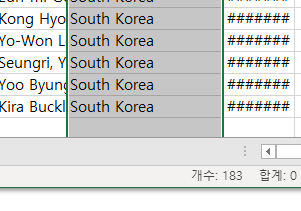

### Bonus Part

 - 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
  1. country column을 기준으로 한다.
  2. 단일 국가인 경우를 기준으로 결과를 구해보자.

In [206]:
nfx_nan_drop = nfx[nfx['country'].notna()]

nfx_country = nfx_nan_drop[~nfx_nan_drop['country'].str.contains(",")]
nfx_country['country'].value_counts().head(1)

United States    2555
Name: country, dtype: int64

# Mission 2. 가즈아!

 ### Mandatory Part
 
 - 2016.6 ~ 2017.6 기간의 `5-MA(Moving Average) 비트코인 가격 그래프`를 그려주세요.
  1. 선의 색깔은 `노란색(#f2a900)`으로 해야합니다.
  2. x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  3. 이동평균의 기준은 `Open` Column으로 계산합니다.
  4. 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet등)을 추가하는 것도 좋습니다.

In [25]:
BTC = pd.read_csv('./BitCoin.csv')

BTC

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


In [36]:
BTC = BTC[BTC['Date'] > '2016-06-00']

In [46]:
BTC = BTC[BTC['Date'] < '2017-06-32']
BTC

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
16,16,2017-06-09,4376.59,4617.25,4376.59,4597.12,2.172100e+09,72418700000
17,17,2017-05-09,4228.29,4427.84,3998.11,4376.53,2.697970e+09,69954400000
18,18,2017-04-09,4591.63,4591.63,4108.40,4236.31,2.987330e+09,75955500000
19,19,2017-03-09,4585.27,4714.08,4417.59,4582.96,1.933190e+09,75841700000
20,20,2017-02-09,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000
...,...,...,...,...,...,...,...,...
621,621,2016-10-01,448.24,448.31,440.35,447.99,3.599590e+07,6752210000
622,622,2016-09-01,453.38,454.64,446.89,447.61,3.227800e+07,6828000000
623,623,2016-08-01,457.54,462.93,447.94,453.23,5.699300e+07,6888600000
624,624,2016-07-01,430.01,458.77,429.08,458.05,8.756220e+07,6472580000


In [47]:
BTC_sorted = BTC.sort_values(by = 'Date')

BTC_sorted

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
594,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
565,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
534,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
504,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
88,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
87,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
86,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000
85,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000


In [67]:
ma5 = BTC_sorted['Open'].rolling(window=5).mean()

ma5.dropna()

504     418.238
473     446.786
443     503.552
412     538.454
381     574.900
         ...   
88     2666.942
87     2624.426
86     2593.564
85     2559.372
84     2545.770
Name: Open, Length: 373, dtype: float64

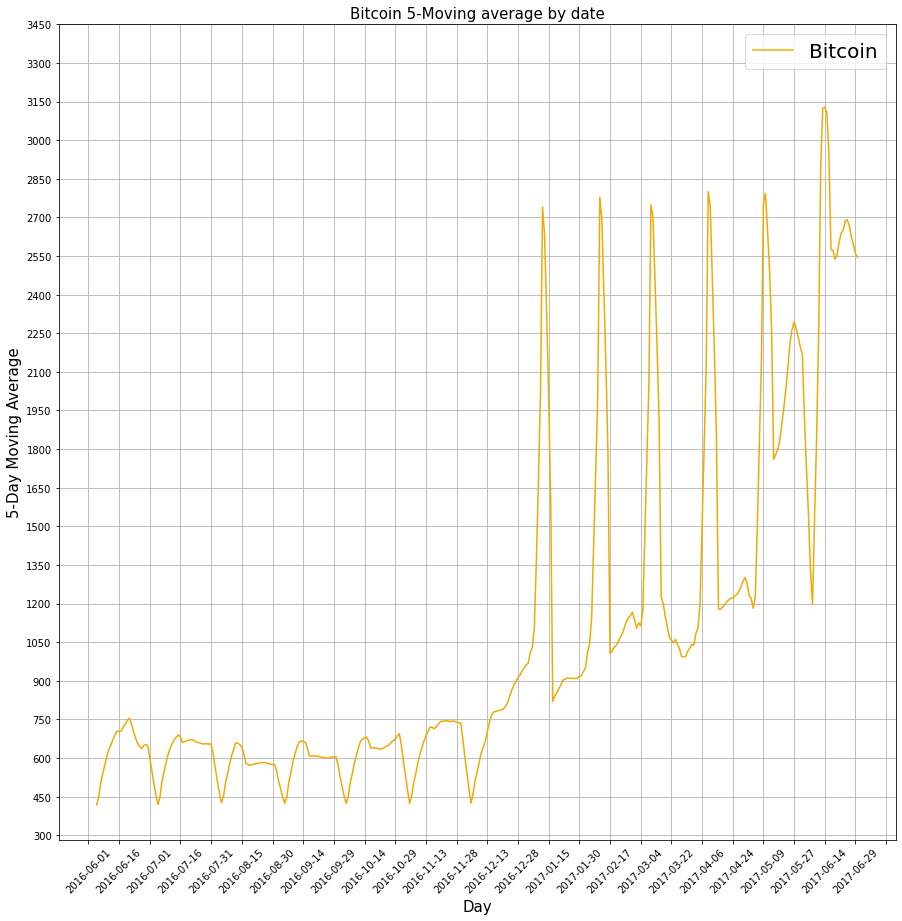

In [171]:
plt.figure(figsize=(15,15))
plt.title("Bitcoin 5-Moving average by date",fontsize = 15)
plt.plot(BTC_sorted['Date'],ma5, label = "Bitcoin", color='#f2a900')

plt.xticks([i for i in range(0,400,15)],rotation = 45)
plt.yticks([i for i in range(300,3500,150)])

plt.xlabel("Day",fontsize = 15)
plt.ylabel("5-Day Moving Average",fontsize = 15)
plt.grid(True)
plt.legend(fontsize = 20)

plt.show()

### Bonus Part

 - 2016.6 ~ 2017.6 기간에 해당하는 `비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시`에 그려주세요.
  1. 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
  2. x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  3. 이동평균의 기준은 `Open` Column으로 계산합니다.
  4. 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [151]:
ETH = pd.read_csv('./ETH_day.csv')

ETH = ETH[ETH['Date'] > '2016-06-00']
ETH = ETH[ETH['Date'] < '2017-06-32']

In [152]:
ETH_sorted = ETH.sort_values(by = 'Date')

In [174]:
ETH_ma5 = ETH_sorted['Open'].rolling(window=5).mean()

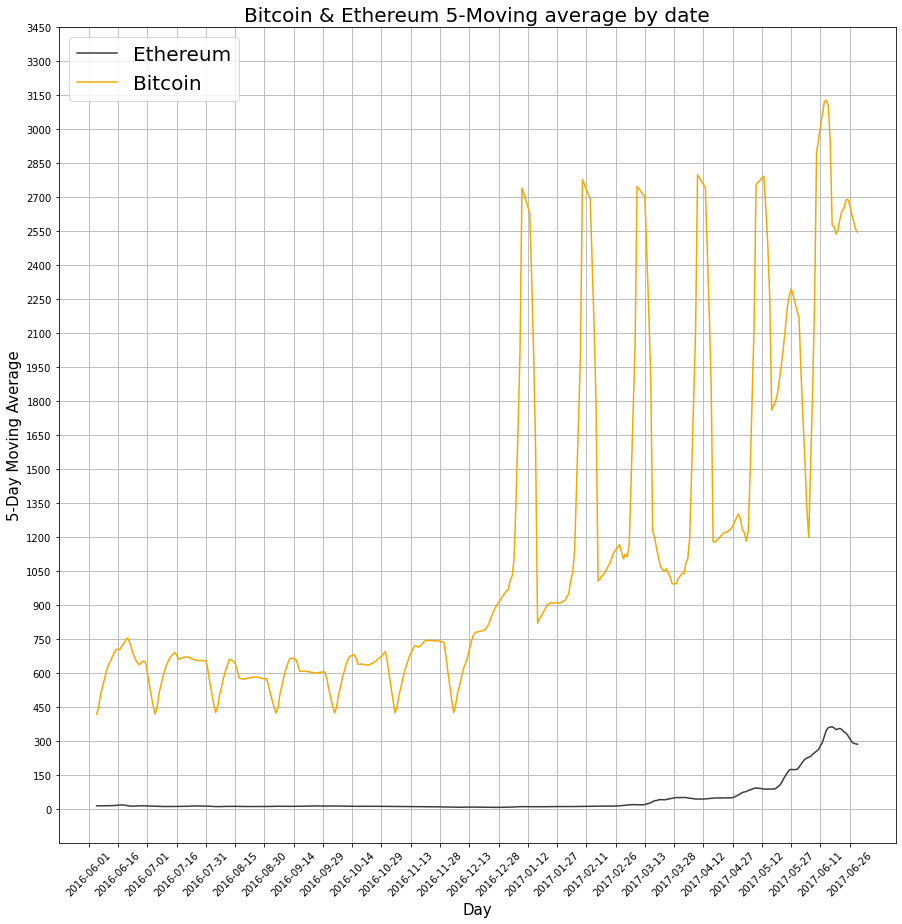

In [173]:
plt.figure(figsize=(15,15))
plt.title("Bitcoin & Ethereum 5-Moving average by date",fontsize = 20)

plt.plot(ETH_sorted['Date'],ETH_ma5, label = "Ethereum", color='#3c3c3d')
plt.plot(BTC_sorted['Date'],ma5, label = "Bitcoin", color='#f2a900')

plt.xticks([i for i in range(0,400,15)],rotation = 45)
plt.yticks([i for i in range(0,3500,150)])

plt.xlabel("Day",fontsize = 15)
plt.ylabel("5-Day Moving Average",fontsize = 15)
plt.grid(True)
plt.legend(fontsize = 20)

plt.show()